# Decision Trees

In [7]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
from sklearn import tree 
import matplotlib.pyplot as plt

In [8]:
iris = load_iris()
x = iris['data']
y = iris['target'] # target is the same as actual/truth

In [9]:
y
# class 0 = setosa
# class 1 = versicolor
# class 2 = virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
df= pd.DataFrame(iris.data,columns=iris.feature_names)

In [19]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [21]:
df[3:9]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2


In [17]:
x_train, x_test, y_train, y_test = train_test_split( x, y, random_state = 25) 
# try different random states

In [18]:
clf = tree.DecisionTreeClassifier() # clf is like classifier variable, sometimes called model

In [19]:
clf = clf.fit(x_train, y_train)
clf.predict(x_test)

array([0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 0])

In [20]:
y_test # true values

array([0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 0])

In [21]:
# tree.plot_tree?
# uncomment above to see documentation

In [29]:
# needs latest sklearn
#pip install scikit-learn>=0.21 # type this into anaconda prompt
# should install
# restart Jupyter notebook
# run the cell below

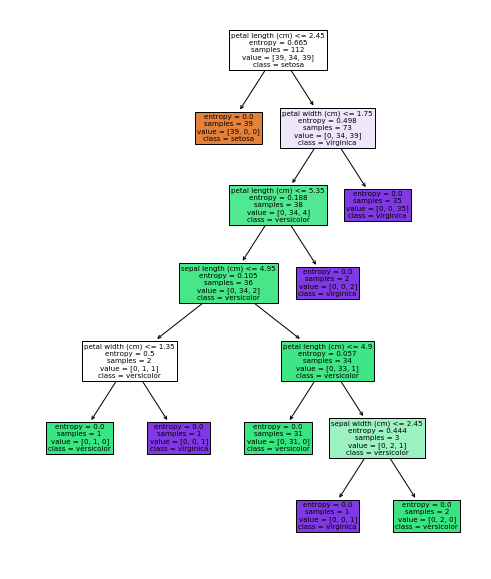

In [30]:
fig = plt.figure(figsize=(8,10))

tree.plot_tree(clf, filled=True, class_names=iris.target_names, feature_names=iris.feature_names);

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier


In [36]:
clf = RandomForestClassifier(n_estimators=5, max_depth=5,random_state=0)
clf.fit(x_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
print(clf.feature_importances_)

[0.16872851 0.04581266 0.10357539 0.68188344]


there are 4 features, it found the last two were the most important

In [38]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [39]:
clf.predict(x_test[:2,:])

array([0, 1])

[sample one, sample two], class predictions

In [40]:
print(y_test[:2])

[0 1]


In [41]:
print(clf.predict(x_test))
print(y_test)

[0 1 2 1 2 1 2 0 1 1 0 0 0 1 0 1 2 2 1 1 1 1 1 0 0 2 1 2 2 0 1 2 2 0 2 1 1
 0]
[0 1 1 1 2 1 2 0 1 1 0 0 0 2 0 1 2 2 1 1 1 1 1 0 0 2 1 2 2 0 1 2 2 0 2 1 1
 0]


In [42]:
clf.score(x_test,y_test) # R2 score

0.9473684210526315

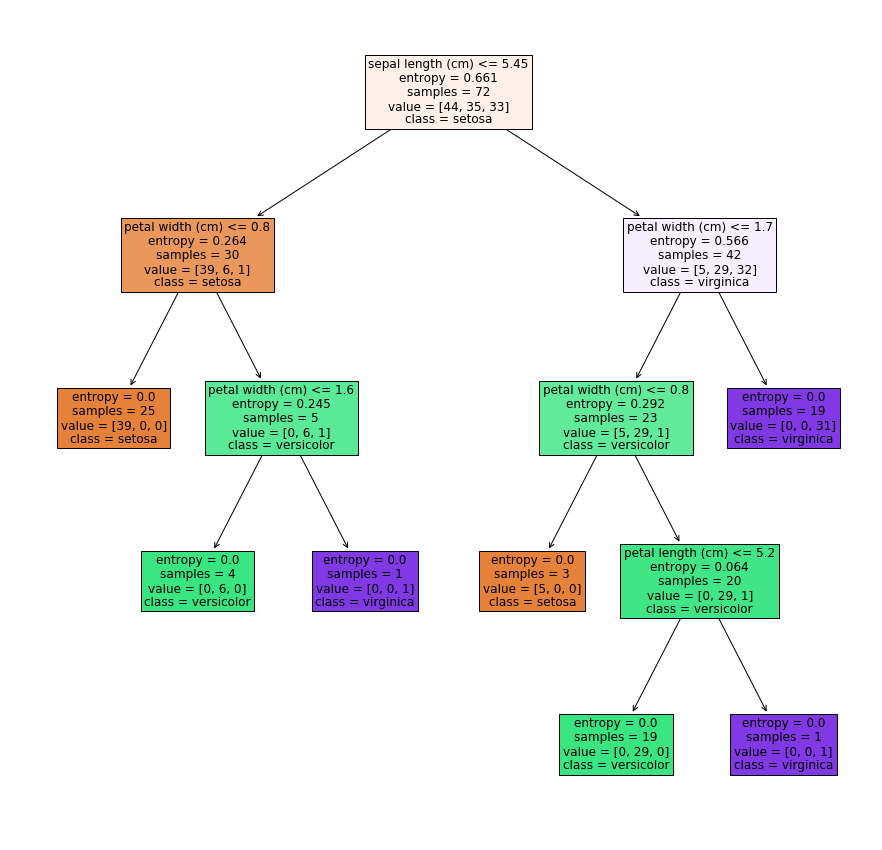

In [46]:
randtree = clf.estimators_[2] #looking at tree 8

fig = plt.figure(figsize=(15,15))

tree.plot_tree(randtree, filled=True, class_names=iris.target_names, feature_names=iris.feature_names);


Tree 8 has grabbed a random selection of samples, 73 of them